<img align="left" src="./assets/books.png">

# Book Recommender Engines

## Part 1: Collaborator-Based: Data Cleaning and EDA<br>
***
### Problem Statement

An independent bookstore is considering having a recommender engine added to their website. They would like a demonstration on what goes into building an engine, as well as a couple examples of the different types available. Two sample book recommender engines were built: one collaborator-based and one content-based. The metric used for evaluation was cosine similarity. 

#### Contents:
- [Imports](#Imports)
- [Reading in the Data](#Reading-in-the-Data)
- [Preliminary Exploratory Data Analysis](#Preliminary-Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Further Exploratory Data Analysis](#Further-Exploratory-Data-Analysis)
- [Saving the DataFrame](#Saving-the-DataFrame)

### Imports

In [1]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in the Data

With collaborator engines, recommendations are based on how users interact with products. This includes purchasing an item, rating it, or listening/watching media. I chose a data set that included user ratings for this reason. The data set is from [Book Crossing](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) and includes three CSV files broken down by user locations, books, and user ratings. When I first tried to read them into pandas, I got tokenizing errors. I had to open then in Excel to address the problem, which was a few overlapping rows. 

In [3]:
#reading in the users file
users = pd.read_csv('./datasets/users.csv', encoding="latin1")
#dropping the unnamed columns
users.drop(columns='Unnamed: 5', inplace = True)
#checking out what's in the file
users.head()

,User-ID,City,State/Providence,Country,Age
0,1.0,nyc,new york,usa,NaN
1,2.0,stockton,california,usa,18
2,3.0,moscow,yukon territory,russia,NaN
3,4.0,porto,v.n.gaia,portugal,17
4,5.0,farnborough,hants,united kingdom,NaN


In [6]:
#reading in the ratings file
ratings = pd.read_csv('./datasets/ratings.csv', encoding="latin1")
#checking out what's in the file
ratings.head()

,User-ID,ISBN,Book-Rating
0,6360,0,0
1,8094,0,0
2,11795,0,0
3,11795,0,0
4,20859,0,0


In [7]:
#reading in the books file
books = pd.read_csv('./datasets/books.csv', encoding="latin1")
#checking out what's in the file
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Preliminary Exploratory Data Analysis

For preliminary EDA, I evaluated content types within each file, as well as whether or not there was missing data. At this point, I'm making an assessment of what needs to be cleaned based on what information I want to use in the recommender.  

In [8]:
#taking a look at the user file types - Age shouldn't be an object, but I suspect there are Nans in there.
users.dtypes

User-ID             float64
City                 object
State/Providence     object
Country              object
Age                  object
dtype: object

In [9]:
#Checking to see if there are nulls in the users
users.isnull().sum()

User-ID                  4
City                   556
State/Providence     16241
Country               4663
Age                 110657
dtype: int64

In [10]:
#Seeing how many ages are missing, I want to see how large the file is and it looks like 40% of the ages
#are missing. I'm going to temporarily drop the NANs so I can see the distro of ages that are available.
users.shape

(276280, 5)

In [11]:
#creating a temp dataframe so I can see what the available ages distro is
temp = users[['User-ID', 'Age']]
temp.dropna().head(1)

,User-ID,Age
1,2.0,18


In [12]:
#I am able to sort ages so I want a closer look as to what's going on, so I'll look at uniques
temp.Age.unique()

array([nan, '18', '17', '61', '26', '14', '25', '19', '46', '55', '32',
       '24', '20', '34', '23', '51', '31', '21', '44', '30', '57', '43',
       '37', '41', '54', '42', '50', '39', '53', '47', '36', '28', '35',
       '13', '58', '49', '38', '45', '62', '63', '27', '33', '29', '66',
       '40', '15', '60', '0', '79', '22', '16', '65', '59', '48', '72',
       '56', '67', '1', '80', '52', '69', '71', '73', '78', '9', '64',
       '103', '104', '12', '74', '75', '231', '3', '76', '83', '68',
       '119', '11', '2', '70', '77', '93', '8', '7', '4', '81', '114',
       '230', '239', '10', '5', '148', '151', '&#22269', '6', '101',
       '201', '96', '84', '82', '90', '123', '244', '133', '91', '128',
       '94', '85', '141', '110', '97', '219', '86', '124', '92', '175',
       '172', '209', '212', '237', '162', '100', '87', '156', '136', '95',
       '89', '106', '99', '108', '210', '88', '199', '147', '168', '132',
       '159', 18.0, 17.0, 41.0, 47.0, 19.0, 31.0, 15.0, 39.0, 58

Glancing over these, I can see that the ages are not going to be much use here. There are ages over 100 and I can't imagine a 2 year old rated books, though maybe a parent rated picture picture books on their behalf. Regardless, the recommender won't be using age information anyway.

In [13]:
#I want to take a look at country info to see if it's any better than age info was
users['Country'].unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', nan, 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', 'bosnia and herzegovina', 'vietnam', 'sri lanka',
       'pakistan', 'denmark', 'belgium', 'malaysia', 'u.a.e', 'turkey',
       'philippines', 'greece', 'colombia', 'norway', 'kuwait', 'chile',
       'quit', 'lj', 'taiwan', 'espaÃ±a', 'sweden', 'argentina',
       'nigeria', 'london', 'bulgaria', 'austria', 'romania', 'victoria',
       'singapore', 'albania', 'egypt', 'tunisia', 'uzbekistan', 'qatar',
       'syria', 'saudi arabia', 'indonesia', 'sudan', 'british columbia',
       'missouri', 'somewherein space', 'poland', 'thailand',
       'metropolitana', 'ireland', 'venezuela', 'paraguay', 'mozambique',
       'morocco', 'afghanistan', 'estonia', 'clackamas', 'lesotho',
      

Based on what the countries look like, I will not be able to use location information, which is okay here because I wouldn't be using it for the recommender anyway. They have states mixed in with countries. I can also see that users typed in this info by hand because "heard of it? :o)" and "somewherein space" are not locations, let alone countries.

In [14]:
#Let's move on to the ratings file and see what types of info are in there. Integers make sense for 
#User-ID and Book-Rating. Object makes sense for ISBN since some have letters as part of it.
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [15]:
#Taking a look at the size of the file
ratings.shape

(1048561, 3)

In [16]:
#Checking if there are any nulls
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [17]:
#I want to confirm that we have ratings entered correctly. 0 means they haven't rated it. 
#Ratings are on a scale of 1-10 per data dictionary. So this looks like we have a correct range of numbers here.
ratings['Book-Rating'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
#Let's look at types for the books file - all types listed there make sense for what I would expect here
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [19]:
#taking a look at the size of the file - looks like we have a lot more books than we have ratings for
books.shape

(271379, 8)

In [20]:
#Any nulls?
books.isnull().sum()

ISBN                       0
Book-Title                 0
Book-Author            37625
Year-Of-Publication    38969
Publisher              38971
Image-URL-S            43231
Image-URL-M            43231
Image-URL-L            43231
dtype: int64

We are missing a lot of data in the books file. But for the recommender, I only need the title and the ISBN to merge the ratings CSV with it. So for the purposes of this project, this missing data is okay.

In [21]:
#Taking a closer look at the publishers to see where most of the books are pulled from. I won't be using 
#publisher in the recommender, this is more of an curiosity glance at the data.
books['Publisher'].value_counts().head()

Pocket              3688
Ballantine Books    3451
Bantam Books        3262
Simon & Schuster    2667
Penguin Books       2610
Name: Publisher, dtype: int64

### Data Cleaning

From preliminary EDA, it looks like I don't have a lot of cleaning to do for the columns I will be using, but before I drop down to just the columns I need for the recommender, I want to drop the urls, then merge files. From there I'll do further EDA to get a better look at the story going on in the data.

In [22]:
#dropping the urls
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], 1,  inplace=True)

In [23]:
#duplicate titles will become a problem for the recommender engine so I'm going to drop them
books = books.drop_duplicates(subset ="Book-Title")

In [24]:
#I'm going to strip the space before and after the title, some of the titles had key errors when being run 
#through the model and I suspect there are spacing issues in the cells
books['Book-Title'] = books['Book-Title'].map(lambda cell: cell.strip())

In [25]:
#combining the ratings and books dataframes
book_ratings = pd.merge(ratings, books, on='ISBN')

In [26]:
#Seeing how big the file is
book_ratings.shape

(382164, 7)

### Further Exploratory Data Analysis

I wanted to take a look at the file once the ratings were added to be able to explore things like what the counts for ratings looks like, plus what the highest rated books are.

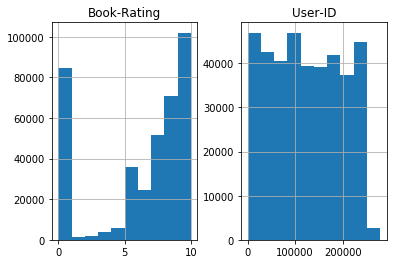

In [27]:
#checking out the numeric columns
book_ratings.hist();

What we an see by this is that we have a lot of unrated books.

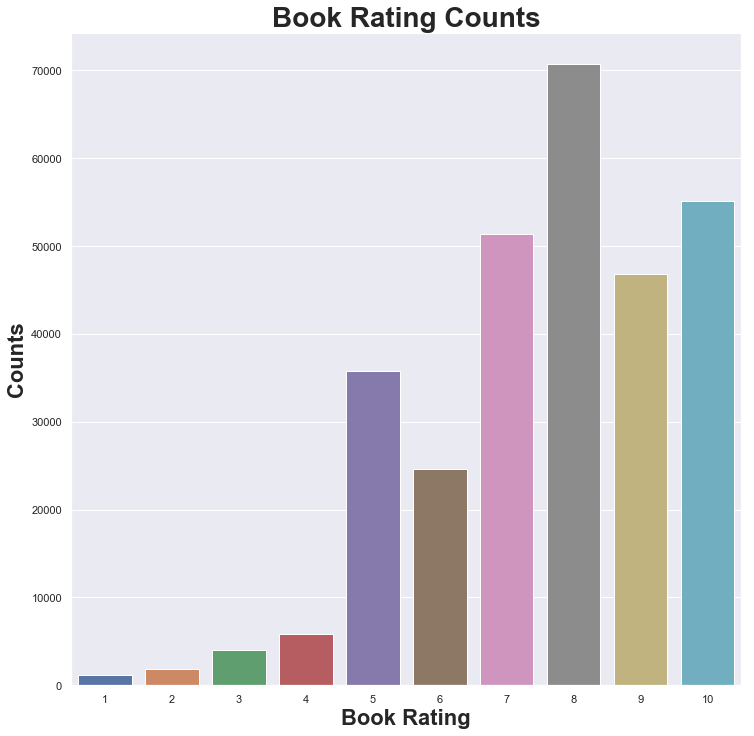

In [28]:
#plotting explicit ratings to see the counts - I pulled out the implicit counts since those are not votes
#larger chart is so I can use it for the presentation
explicit_ratings = book_ratings[book_ratings['Book-Rating'] != 0]
plt.figure(figsize = (12,12))
sns.set(style="darkgrid")
ax = sns.countplot(x="Book-Rating", data=explicit_ratings)
plt.title("Book Rating Counts", fontsize=28,fontweight='bold')
plt.ylabel("Counts", fontsize= 22,fontweight='bold')
plt.xlabel("Book Rating", fontsize= 22,fontweight='bold');

It's interesting to see the skew here. Of the titles voted on, people seemed to really favor whatever it was that they read. Next, I want to take a look at what the most popular books are for these users.

In [31]:
#geting the sums of the explicit ratings per isbn
ratings_sums = pd.DataFrame(explicit_ratings.groupby(['ISBN'])['Book-Rating'].sum())
#soriting so the favorites show up at the top
favorites = ratings_sums.sort_values('Book-Rating', ascending = False)
#merging with the books csv by isbn
favorite_books = favorites.merge(books, left_index = True, right_on = 'ISBN')

In [30]:
#seeing how many books were rated
favorite_books.shape

(123590, 6)

In [266]:
#let's look at the top 10 rated books
favorite_books.head(10)

,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
408,5188,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,Little
748,3814,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,2890,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2546,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2404,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2337,971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2292,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2145,446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
118,2043,671027360,Angels & Demons,Dan Brown,2001,Pocket Star
231,2040,452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


In [267]:
#The Lovely Bones and Da Vinci Code make sense for the time period of books. Let's take a look at least popular:
favorite_books.tail(10)

,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
240193,1,771091176,More Joy in Heaven,Callaghan,1970,McClelland & Stewart
256983,1,2070361861,Les rÃ?Âªveries du promeneur solitaire,Jean-Jacques Rousseau,1972,Gallimard
43647,1,618131655,Coming Soon!!!,John Barth,2001,Houghton Mifflin Company
180938,1,1565077172,The God Makers,Ed Decker,1997,Harvest House Publishers
164859,1,882077589,What Husbands Wish Their Wives Knew About Money,Larry Burkett,1982,Cook Communications Ministries intl
100898,1,806513500,The 100: A Ranking of the Most Influential Per...,Michael H. Hart,1992,Citadel Press
158567,1,310251117,Threshold (Book 2 of the Fire of Heaven Trilogy),Bill Myers,2003,Zondervan Publishing Company
76495,1,528842862,Rand McNally 2001 Road Atlas: United States,NaN,NaN,NaN
190538,1,531003809,The Plant People (Triumph Book),Dale Bick Carlson,1977,Scholastic Library Pub
197779,1,806501626,Essays in Existentialism,Jean-Paul Sartre,1993,Carol Publishing Corporation


There are a lot of books in the system that only have 1 rating. I'm also noting that with the Rousseau title, it appears there are issues reading in some of the foreign characters into the Jupiter notebook. I ran out of time researching foreign language libraries/packages, but I will note including it in next steps.

### Saving the DataFrame

In [273]:
#saving the explicit_ratings dataframe to a csv
explicit_ratings.to_csv('./datasets/explicit_ratings.csv')

**Please continue to [2-Collaborator-Based-Preprocessing-and-Engine.ipynb](./2-Collaborator-Based-Preprocessing-and-Engine.ipynb) for the next step in the project: Preprocessing and Engine**